# Project 1 Task 1
### Hrishikesh Deshpande (hd11) - Task 1.1 Code
### Karthik Appana (kappana2) - Task 1.2 Code
### Siddharth Gummadapu (sg96) - Question Solutions

In [83]:
# imports
import numpy as np
import scipy.io as sio
import scipy.stats as stat
import matplotlib.pyplot as plt
import random

In [84]:
# load data from mat file
matFile = sio.loadmat('patient_data.mat')

In [109]:
# create random samples of 1000 and 70 from original population of 30000
respRateLarge = matFile['data'][2]
respRateMedium = random.sample(list(respRateLarge), 1000)
respRateSmall = random.sample(list(respRateLarge), 70)

In [110]:
# floor all values in each sample group
flooredRRL = [np.floor(i) for i in respRateLarge]
flooredRRM = [np.floor(i) for i in respRateMedium]
flooredRRS = [np.floor(i) for i in respRateSmall]

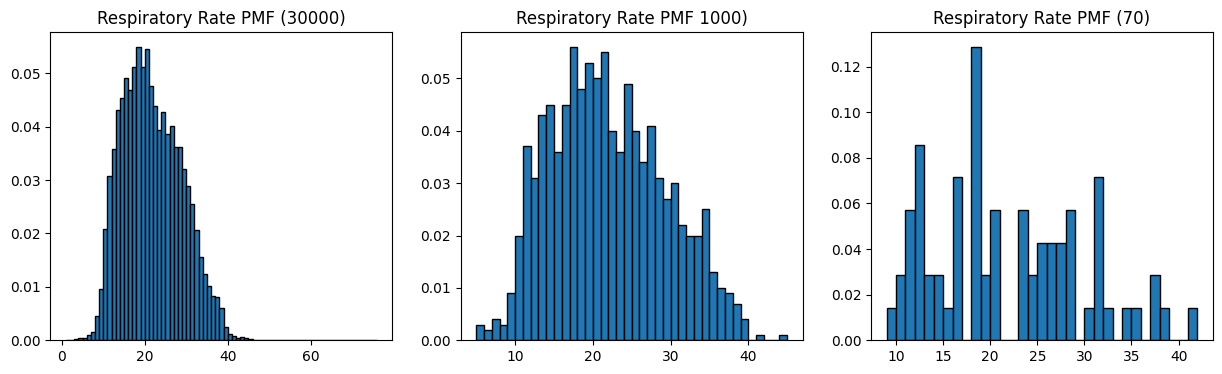

In [111]:
figure, axis = plt.subplots(1, 3, figsize=(15, 4))

# plot all pmfs
axis[0].hist(flooredRRL, edgecolor='black', weights=np.ones_like(flooredRRL) / len(flooredRRL), 
             bins=int(max(flooredRRL) - min(flooredRRL)))
axis[0].set_title('Respiratory Rate PMF (30000)')
axis[1].hist(flooredRRM, edgecolor='black', weights=np.ones_like(flooredRRM) / len(flooredRRM), 
             bins=int(max(flooredRRM) - min(flooredRRM)))
axis[1].set_title('Respiratory Rate PMF 1000)')
axis[2].hist(flooredRRS, edgecolor='black', weights=np.ones_like(flooredRRS) / len(flooredRRS), 
             bins=int(max(flooredRRS) - min(flooredRRS)))
axis[2].set_title('Respiratory Rate PMF (70)')
plt.show()

plt.show()

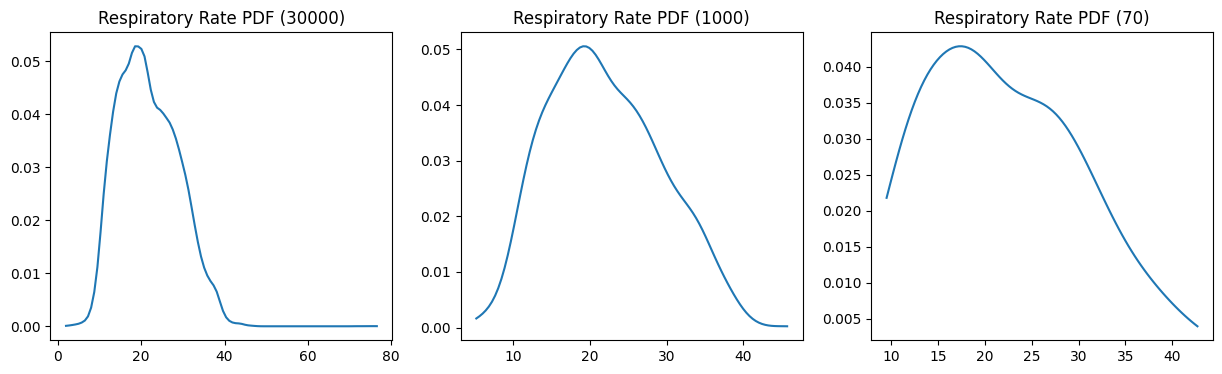

In [112]:
# use gaussian_kde for pdf approximation
pdfRRL = stat.gaussian_kde(respRateLarge)
pdfRRM = stat.gaussian_kde(respRateMedium)
pdfRRS = stat.gaussian_kde(respRateSmall)

# create x axis linspace for pdf
distRRL = np.linspace(min(respRateLarge), max(respRateLarge), 100)
distRRM = np.linspace(min(respRateMedium), max(respRateMedium), 100)
distRRS = np.linspace(min(respRateSmall), max(respRateSmall), 100)

pdfFigure, pdfAxis = plt.subplots(1, 3, figsize=(15, 4))

# plot all pdfs
pdfAxis[0].plot(distRRL, pdfRRL(distRRL))
pdfAxis[0].set_title('Respiratory Rate PDF (30000)')
pdfAxis[1].plot(distRRM, pdfRRM(distRRM))
pdfAxis[1].set_title('Respiratory Rate PDF (1000)')
pdfAxis[2].plot(distRRS, pdfRRS(distRRS))
pdfAxis[2].set_title('Respiratory Rate PDF (70)')
plt.show()


### Task 1.1a Question 2
The PMF plots show discrete probability bars with visible noise, especially at smaller sample sizes.  Meanwhile, the PDF plots present smooth continuous curves that reveal the underlying general distribution shape of the data. The pdf does this by eliminating the random fluctuations in the  data, resulting in a smoothened curve.

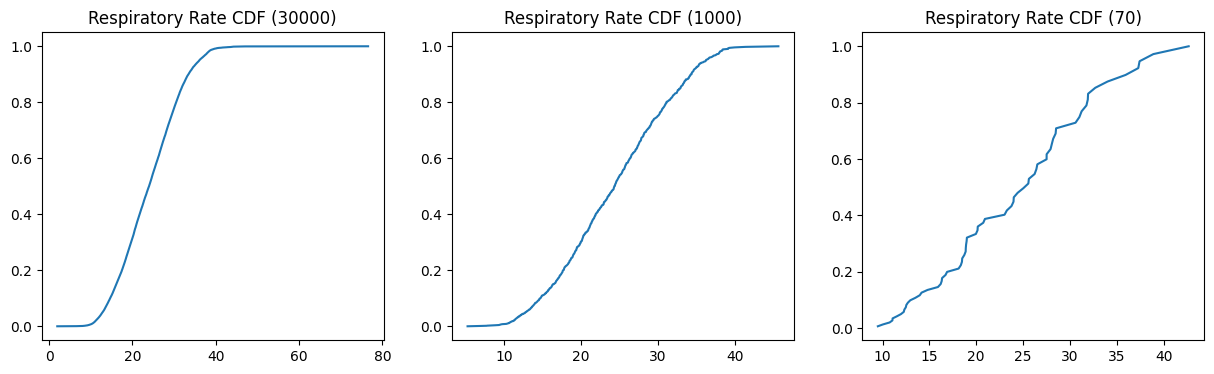

In [113]:
# sort data
sortedRRL = np.sort(respRateLarge)
sortedRRM = np.sort(respRateMedium)
sortedRRS = np.sort(respRateSmall)

# generate cumulative data for cdf
cumdataRRL = np.cumsum(sortedRRL) / np.sum(sortedRRL)
cumdataRRM = np.cumsum(sortedRRM) / np.sum(sortedRRM)
cumdataRRS = np.cumsum(sortedRRS) / np.sum(sortedRRS)

cdfFigure, cdfAxis = plt.subplots(1, 3, figsize=(15, 4))

# plot all cdfs
cdfAxis[0].plot(sortedRRL, cumdataRRL)
cdfAxis[0].set_title('Respiratory Rate CDF (30000)')
cdfAxis[1].plot(sortedRRM, cumdataRRM)
cdfAxis[1].set_title('Respiratory Rate CDF (1000)')
cdfAxis[2].plot(sortedRRS, cumdataRRS)
cdfAxis[2].set_title('Respiratory Rate CDF (70)')
plt.show()


### Task 1.1a Question 3
As the sample size increases from 70 to 30000, the CDF graph smoothens out by a significant amount. We can see that the CDF for the sample size 70 graph starts out looking much more linear before it flattens out near the top. On the other hand, the CDF for the sample size 30000 graph looks closer to a normal CDF due to the increased volume of data.

In [114]:

_ , countsRRL = np.unique(flooredRRL, return_counts=True)
_ , countsRRM = np.unique(flooredRRM, return_counts=True)
_ , countsRRS = np.unique(flooredRRS, return_counts=True)

probsRRL = countsRRL / len(flooredRRL)
probsRRM = countsRRM / len(flooredRRM)
probsRRS = countsRRS / len(flooredRRS)

minRRL = np.min(probsRRL)
minRRM = np.min(probsRRM)
minRRS = np.min(probsRRS)

maxRRL = np.max(probsRRL)
maxRRM = np.max(probsRRM)
maxRRS = np.max(probsRRS)

print(f"Respiration Rate (30000) - Min probability: {minRRL.round(4)}, Max probability: {maxRRL.round(4)}")
print(f"Respiration Rate (1000) - Min probability: {minRRM.round(4)}, Max probability: {maxRRM.round(4)}")
print(f"Respiration Rate (70) - Min probability: {minRRS.round(4)}, Max probability: {maxRRS.round(4)}")

Respiration Rate (30000) - Min probability: 0.0, Max probability: 0.0549
Respiration Rate (1000) - Min probability: 0.001, Max probability: 0.056
Respiration Rate (70) - Min probability: 0.0143, Max probability: 0.1286


### Task 1.1b Question 1
The distributions we get are more normal with the higher sample sizes, and become more random and skewed as we decrease the sample size. This is because with smaller samples, random chance plays a bigger role in determining the observed distribution. So with the higher sample sizes the variability does not affect the distribution, making it look more normal.

### Task 1.1b Question 2
In the derived min and max probabilities for each distribution, you can see that the both the minimum and maximum probabilities increase as the sample size decreases. The probability density function of each distribtuion must have a total area of 1, but as the sample size decreases, this forces the density to concentrate around existing data points. This creates maximum values and elevates the overall minimum values to compensate for the narrower spread of the distribution.

### Task 1.1b Question 3
One characteristic that these differences reveal about PDFs is that they are heavily affected by sample size but still must maintain a total area of 1. In PDFs, the total area must equal 1, so with fewer samples, probability mass concentrates more around the given data points. This concentration effect also reveals how PDFs maintain their properties while adapting to different sample sizes, demonstrating the trade-off between smoothness and density.

In [115]:
# use np.where to find where a and b are
print("Calculated a and b values for 1.1c:")
aRRL = np.where(cumdataRRL <= 0.02)[0][-1]
print('a = ', sortedRRL[aRRL].round(1))
bRRL = np.where(cumdataRRL >= 0.98)[0][0]
print('b = ', sortedRRL[bRRL].round(1))

Calculated a and b values for 1.1c:
a =  11.2
b =  38.2


In [132]:
# find mean and sd to convert to normal dist
mu = np.mean(respRateLarge)
sd = np.std(respRateLarge)
s = np.random.normal(mu, sd, 1000)

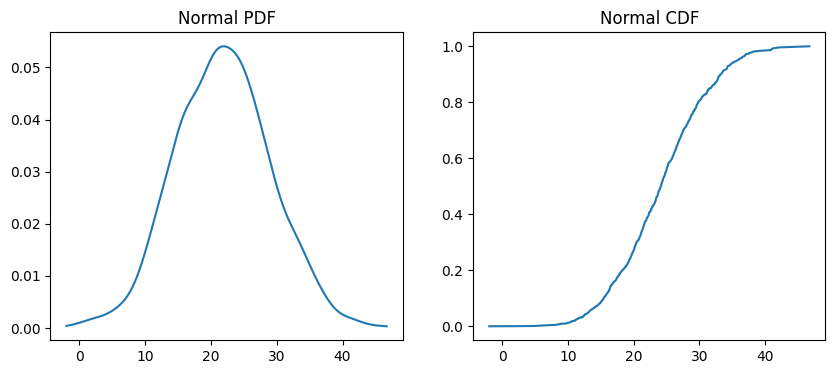

In [133]:
# generate pdf data
pdfS = stat.gaussian_kde(s)
distS = np.linspace(min(s), max(s), 1000)

# generate cdf data
sortedS = np.sort(s)
cumdataS = np.cumsum(sortedS) / np.sum(sortedS)

normalFig, normalAxis = plt.subplots(1, 2, figsize=(10, 4))

# plot normal pdf and cdf
normalAxis[0].plot(distS, pdfS(distS))
normalAxis[0].set_title('Normal PDF')
normalAxis[1].plot(sortedS, cumdataS)
normalAxis[1].set_title('Normal CDF')
plt.show()

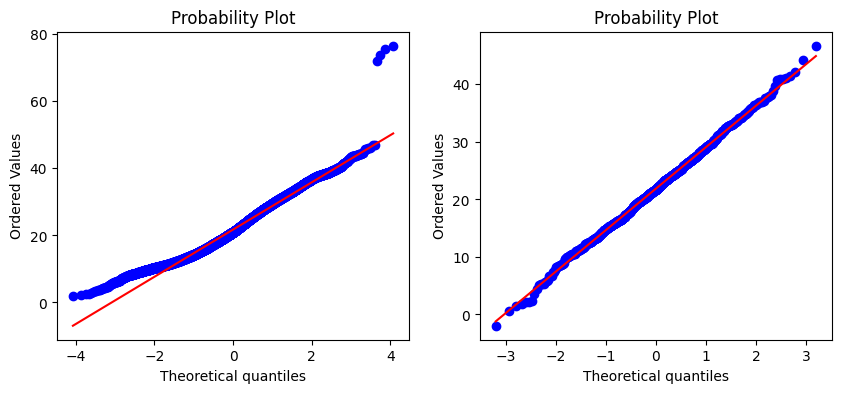

RMSE for non-normal data: 0.9798
RMSE for normal data: 0.2468
Variance for non-normal data: 0.981
Variance for normal data: 0.9988


In [134]:
# use probplot to find diff from normal dist
compFig, compAxis = plt.subplots(1, 2, figsize=(10, 4))
resRRL = stat.probplot(respRateLarge, dist="norm", plot=compAxis[0])
resNorm = stat.probplot(s, dist="norm", plot=compAxis[1])
plt.show()

# get slope, intercept, and r-value
slopeRRL, interceptRRL, rRRL = resRRL[1]
slopeNorm, interceptNorm, rNorm = resNorm[1]

# generate predicted values using slope and intercept
predictedRRL = slopeRRL * resRRL[0][0] + interceptRRL
predictedNorm = slopeNorm * resNorm[0][0] + interceptNorm

# calculate rmse error between actual and predicted values
rmseRRL = np.sqrt(np.square(np.subtract(resRRL[0][1], predictedRRL)).mean())
rmseNorm = np.sqrt(np.square(np.subtract(resNorm[0][1], predictedNorm)).mean())

# display rmse errors and r-values
print(f"RMSE for non-normal data: {rmseRRL.round(4)}")
print(f"RMSE for normal data: {rmseNorm.round(4)}")
print(f"Variance for non-normal data: {(rRRL**2).round(4)}")
print(f"Variance for normal data: {(rNorm**2).round(4)}")


### Task 1.2c
The probability plots show that the non-normal data significantly deviates from the reference line with a strong upward curve at the upper end, indicating right-skewed data with potential outliers. In contrast, the normal data (right) follows the reference line closely throughout with a much lower RMSE value, 0.3393 as compared to 0.9798, demonstrating it better represents a normal distribution compared to the respiratory rate data from Task 1.1, which showed its own unique type of distribution that was slightly similar to a normal distribution but slightly skewed.

In [135]:
# z-scores found using lookup table
lowerZ = -2.06
upperZ = 2.06

# convert to lower and upper bound of data
lowerBound = (lowerZ * sd) + mu
upperBound = (upperZ * sd) + mu

# display a and b
print("Calculated a and b values for 1.2d:")
print('a = ', lowerBound.round(2))
print('a = ', upperBound.round(2))

Calculated a and b values for 1.2d:
a =  7.11
a =  36.38


### Task 1.2d
Comparing the a and b values from both tasks, the non-normal data has a higher minimum, a=11.2 as compared to a=7.11, and a higher maximum, b=38.2 as compared to b=36.38, than the normal data, indicating a narrower overall range. This supports what we see in the probability plots, where the non-normal data deviates significantly from normality with a pronounced right skew, while the normal data follows a more balanced distribution across its range.